In [1]:
import random
import math
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
%matplotlib inline

# 1 Preliminary Data Analysis

## 1.1 Demographic Information

In [2]:
chicago_table = pd.read_csv('bikeshare/chicago.csv')
dc_table = pd.read_csv('bikeshare/dc.csv')
ny_table = pd.read_csv('bikeshare/ny.csv')
daily_table = pd.read_csv('bikeshare/day.csv')

### 1.1.1 Male/Female in Chicago

In [3]:
chi_male_female = chicago_table.groupby('gender').agg('count')
chi_male_female

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,birthyear
gender,,,,,,,,,,,
Female,13783,13783,13783,13783,13783,13783,13783,13783,13783,13783,13783
Male,41194,41194,41194,41194,41194,41194,41194,41194,41194,41194,41194


Text(0.5, 1.0, 'Distribution of Male/Female Riders')

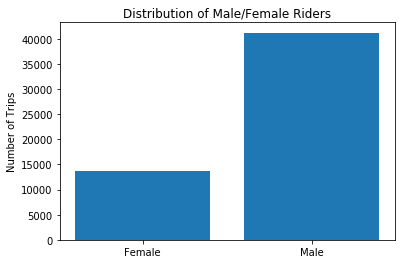

In [4]:
plt.bar([0,1], chi_male_female['trip_id'])
plt.xticks([0,1], ['Female', 'Male'])
plt.ylabel('Number of Trips')
plt.title('Distribution of Male/Female Riders')

### 1.1.2 Gender in NY

In [5]:
ny_gender = ny_table.groupby('gender').agg('count')
ny_gender

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year
gender,,,,,,,,,,,,,,
0,32329,32329,32329,32329,32329,32329,32329,32329,32329,32329,32329,32329,32320,679
1,184681,184681,184681,184681,184681,184681,184681,184681,184681,184681,184681,184681,184210,184674
2,59788,59788,59788,59788,59788,59788,59788,59788,59788,59788,59788,59788,59551,59784


Text(0.5, 1.0, 'Distribution of Gender in NY')

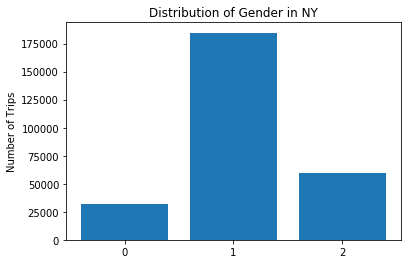

In [6]:
plt.bar([0,1,2], ny_gender['tripduration'])
plt.xticks([0,1,2], ['0', '1', '2'])
plt.ylabel('Number of Trips')
plt.title('Distribution of Gender in NY')

### 1.1.3  Educated Guess

Based on the gender distribution in the Chicago distribution of male/female, where there are significantly more male riders than female riders, but still a substantial number of female riders, my educated guess is that Unspecified corresponds to 0, Male corresponds to 1, and Female corresponds to 2.

### 1.1.4 Birth Year in Chicago/NY

Text(0.5, 1.0, 'Distribution by Birth Year in Chicago')

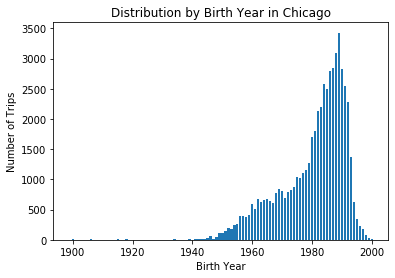

In [7]:
chi_year = chicago_table.groupby('birthyear').agg('count')
plt.bar(chi_year.index, chi_year['trip_id'])
plt.xlabel('Birth Year')
plt.ylabel('Number of Trips')
plt.title('Distribution by Birth Year in Chicago')

Text(0.5, 1.0, 'Distribution by Birth Year in New York')

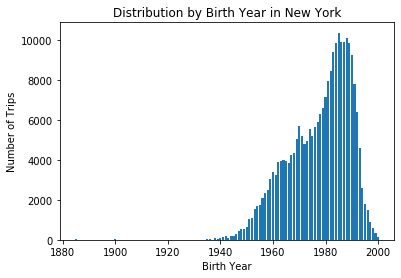

In [8]:
ny_year = ny_table.groupby('birth year').agg('count')
plt.bar(ny_year.index, ny_year['tripduration'])
plt.xlabel('Birth Year')
plt.ylabel('Number of Trips')
plt.title('Distribution by Birth Year in New York')

### 1.1.5 Discussion of Results

Both the distributions by birth year in Chicago and New York have the most trips by people who were born between 1980 and 1990. This makes sense intuitively, because those are the people who are most physically capable to ride a bike, likely to do so (whether to work or for leisure), and who have the correct means of payment to rent one. I would remove the outliers, especially those before 1930, because those riders would most likely no longer be physically capable of riding a bike anymore.

## 1.2 Rental Times

### 1.2.1 Trip Duration

Text(0.5, 1.0, 'Distribution of Trip Duration in Chicago')

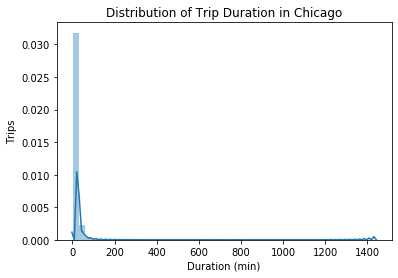

In [9]:
chi_minutes = chicago_table['tripduration']/60
sns.distplot(chi_minutes, bins=50)
plt.xlabel('Duration (min)')
plt.ylabel('Trips')
plt.title('Distribution of Trip Duration in Chicago')

Text(0.5, 1.0, 'Distribution of Trip Duration in New York')

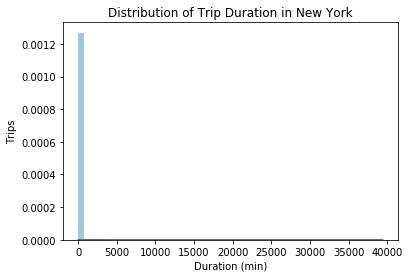

In [10]:
ny_minutes = ny_table['tripduration']/60
sns.distplot(ny_minutes)
plt.xlabel('Duration (min)')
plt.ylabel('Trips')
plt.title('Distribution of Trip Duration in New York')

Text(0.5, 1.0, 'Distribution of Trip Duration in DC')

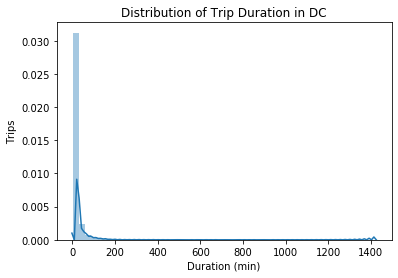

In [11]:
dc_minutes = dc_table['Duration (ms)']/(1000*60)
sns.distplot(dc_minutes)
plt.xlabel('Duration (min)')
plt.ylabel('Trips')
plt.title('Distribution of Trip Duration in DC')

### 1.2.2 Generated Plots

The generated plots are not useful, because the majority of the trips are concentrated in the lower duration region, but the outliers skew the plots too far to the left to make them comprehensible. Below, I have replotted them, removing those outliers, in order to make the plots readable and analyzable.

Text(0.5, 1.0, 'Distribution of Trip Duration in Chicago')

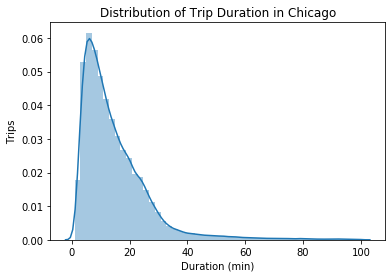

In [12]:
chi_less_100 = [i for i in chi_minutes if i < 100]
sns.distplot(chi_less_100)
plt.xlabel('Duration (min)')
plt.ylabel('Trips')
plt.title('Distribution of Trip Duration in Chicago')

Text(0.5, 1.0, 'Distribution of Trip Duration in New York')

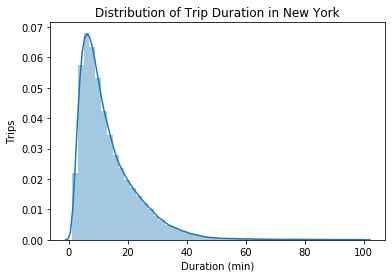

In [13]:
ny_less_100 = [i for i in ny_minutes if i < 100]
sns.distplot(ny_less_100)
plt.xlabel('Duration (min)')
plt.ylabel('Trips')
plt.title('Distribution of Trip Duration in New York')

Text(0.5, 1.0, 'Distribution of Trip Duration in DC')

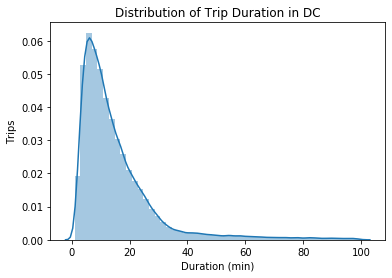

In [14]:
dc_less_100 = [i for i in dc_minutes if i < 100]
sns.distplot(dc_less_100)
plt.xlabel('Duration (min)')
plt.ylabel('Trips')
plt.title('Distribution of Trip Duration in DC')

### 1.2.3 Start Times

In [15]:
chicago_table_copy = chicago_table
chicago_table_copy['hour'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').hour for i in chicago_table_copy['starttime']]
chicago_copy_byhour = chicago_table_copy.groupby('hour').agg('count')

Text(0.5, 1.0, 'Distribution of Start Times in Chicago')

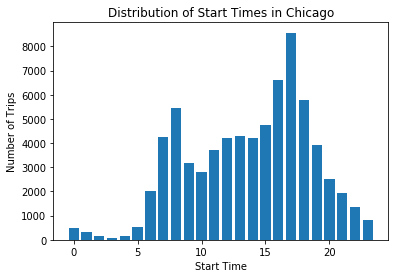

In [16]:
plt.bar(np.arange(24), chicago_copy_byhour['trip_id'])
plt.xlabel('Start Time')
plt.ylabel('Number of Trips')
plt.title('Distribution of Start Times in Chicago')

In [17]:
ny_table_copy = ny_table
ny_table_copy['hour'] = [datetime.strptime(i, '%m/%d/%Y %H:%M:%S').hour for i in ny_table_copy['starttime']]
ny_copy_byhour = ny_table_copy.groupby('hour').agg('count')

Text(0.5, 1.0, 'Distribution of Start Times in New York')

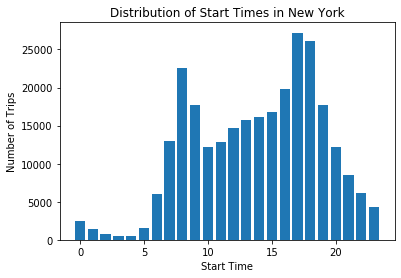

In [18]:
plt.bar(np.arange(24), ny_copy_byhour['tripduration'])
plt.xlabel('Start Time')
plt.ylabel('Number of Trips')
plt.title('Distribution of Start Times in New York')

In [19]:
dc_table_copy = dc_table
dc_table_copy['hour'] = [datetime.strptime(i, '%m/%d/%Y %H:%M').hour for i in dc_table_copy['Start date']]
dc_copy_byhour = dc_table_copy.groupby('hour').agg('count')

Text(0.5, 1.0, 'Distribution of Start Times in DC')

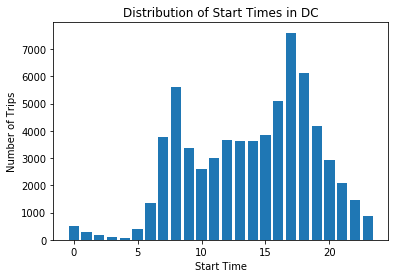

In [20]:
plt.bar(np.arange(24), dc_copy_byhour['Duration (ms)'])
plt.xlabel('Start Time')
plt.ylabel('Number of Trips')
plt.title('Distribution of Start Times in DC')

### 1.2.4 Results Discussion

The three plots are all quite similar and do fit with intuition, because most of the rides are concentrated during daytime hours, which would be the most likely time people would be riding bikes, with peaks at the beginning of the day and the end of the day, particularly around the times people are going to and coming from work.

## 1.3 Further Exploration

### 1.3.1 Visualize three more attributes

The three attributes I visualized were start stations, end stations, and user type.

Text(0.5, 1.0, 'Distribution of Start and End Stations in Chicago')

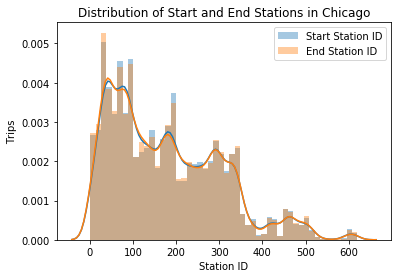

In [21]:
sns.distplot(chicago_table['from_station_id'], label='Start Station ID')
sns.distplot(chicago_table['to_station_id'], label='End Station ID')
plt.legend()
plt.xlabel('Station ID')
plt.ylabel('Trips')
plt.title('Distribution of Start and End Stations in Chicago')

Text(0.5, 1.0, 'User Type in Chicago')

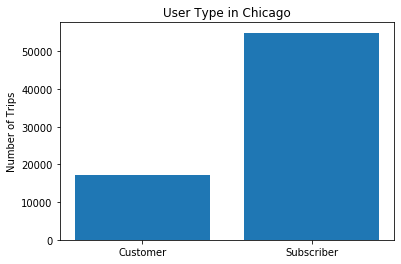

In [22]:
chicago_usertype = chicago_table.groupby('usertype').agg('count')
plt.bar([0,1], chicago_usertype['trip_id'])
plt.xticks([0,1], ['Customer', 'Subscriber'])
plt.ylabel('Number of Trips')
plt.title('User Type in Chicago')

Text(0.5, 1.0, 'Distribution of Start and End Stations in New York')

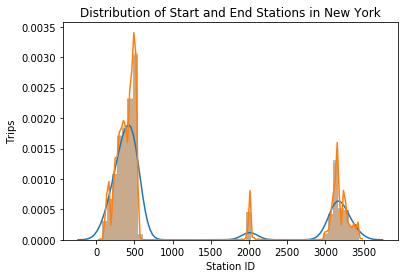

In [23]:
sns.distplot(ny_table['start station id'], label='Start Station ID')
sns.distplot(ny_table['end station id'], label='Start Station ID')
plt.xlabel('Station ID')
plt.ylabel('Trips')
plt.title('Distribution of Start and End Stations in New York')

Text(0.5, 1.0, 'User Type in New York')

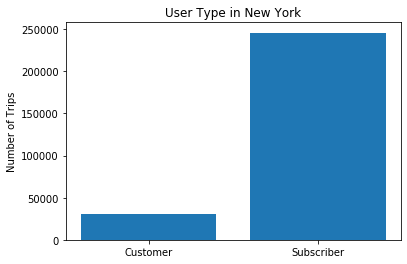

In [24]:
ny_usertype = ny_table.groupby('usertype').agg('count')
plt.bar([0,1], ny_usertype['tripduration'])
plt.xticks([0,1], ['Customer', 'Subscriber'])
plt.ylabel('Number of Trips')
plt.title('User Type in New York')

Text(0.5, 1.0, 'Distribution of Start and End Stations in DC')

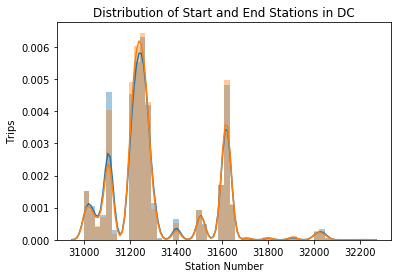

In [25]:
sns.distplot(dc_table['Start station number'], label='Start Station Number')
sns.distplot(dc_table['End station number'], label='Start Station Number')
plt.xlabel('Station Number')
plt.ylabel('Trips')
plt.title('Distribution of Start and End Stations in DC')

Text(0.5, 1.0, 'Member Type in DC')

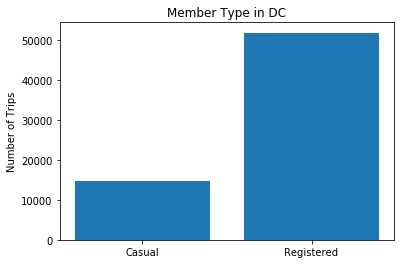

In [26]:
dc_usertype = dc_table.groupby('Member Type').agg('count')
dc_usertype
plt.bar([0,1], dc_usertype['Duration (ms)'])
plt.xticks([0,1], ['Casual', 'Registered'])
plt.ylabel('Number of Trips')
plt.title('Member Type in DC')

### 1.3.2 Discussion of visualizations

In all three of the cities, there are more significantly more subscribers or registered members than customers or casual riders, which makes sense, considering these are all metropolitan areas, meaning locals would most likely be subscribed or registered. Furthermore, in all three cities, the distribution of start and end stations is almost exactly the same, which would make sense if the trips that were started at a station also ended at that station.

### 1.3.3 Further Exploration of Attribute

I will further explore the start station attribute.

Text(0.5, 1.0, 'Distribution of Start Stations in New York')

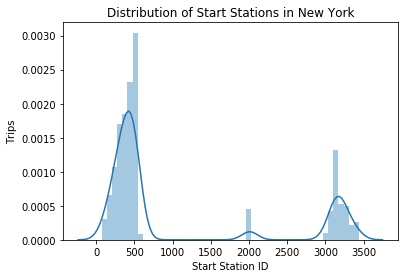

In [27]:
sns.distplot(ny_table['start station id'], label='Start Station ID')
plt.xlabel('Start Station ID')
plt.ylabel('Trips')
plt.title('Distribution of Start Stations in New York')

I wanted to see if the user type affected the start/end locations.

Text(0.5, 1.0, 'Start and End Stations in New York')

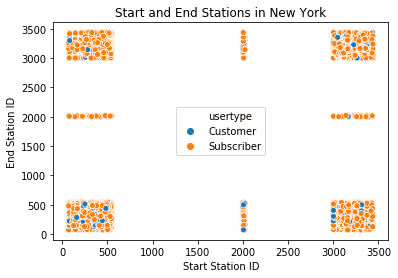

In [28]:
sns.scatterplot(ny_table['start station id'], ny_table['end station id'], hue=ny_table['usertype'])
plt.xlabel('Start Station ID')
plt.ylabel('End Station ID')
plt.title('Start and End Stations in New York')

This plot was too dense and difficult to interpret, so I used a jointplot instead, without the usertype distinction.

Text(0.5, 1, 'Start and End Stations in New York')

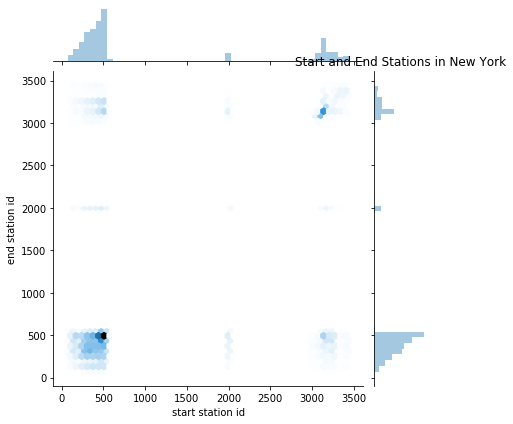

In [29]:
sns.jointplot('start station id', 'end station id', data=ny_table, kind='hex')
plt.title('Start and End Stations in New York')

There doesn't seem to be any significant correlation, so I started exploring the latitude and longitude.

Text(0.5, 1, 'Start Stations in New York')

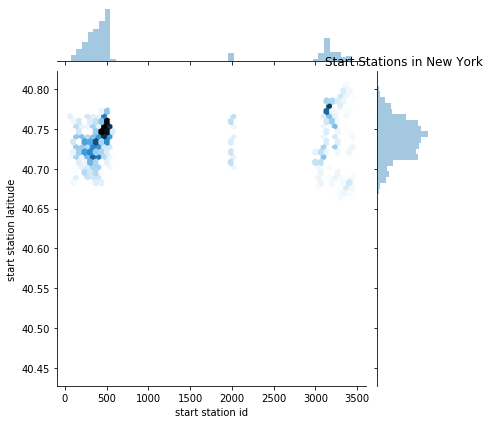

In [30]:
sns.jointplot('start station id', 'start station latitude', data=ny_table, kind='hex')
plt.title('Start Stations in New York')

Text(0.5, 1, 'Start Stations in New York')

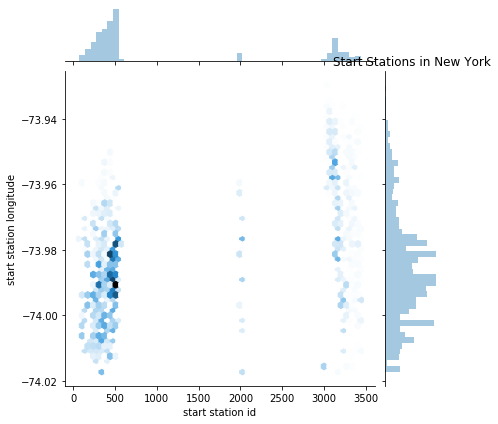

In [31]:
sns.jointplot('start station id', 'start station longitude', data=ny_table, kind='hex')
plt.title('Start Stations in New York')

I then filtered out all the non-subscribers to see if there was a pattern or difference between the two groups and their trip routes.

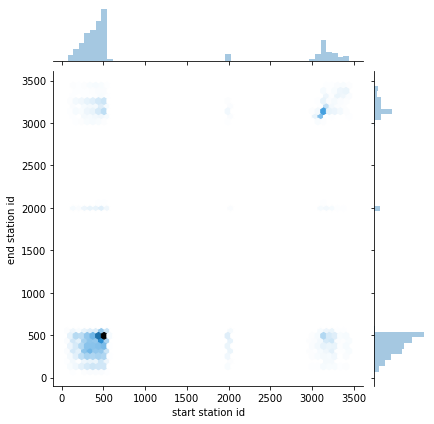

In [32]:
ny_table_subs = ny_table[ny_table['usertype']=='Subscriber']
sns.jointplot('start station id', 'end station id', data=ny_table_subs, kind='hex')

And then repeated that process for the customers.

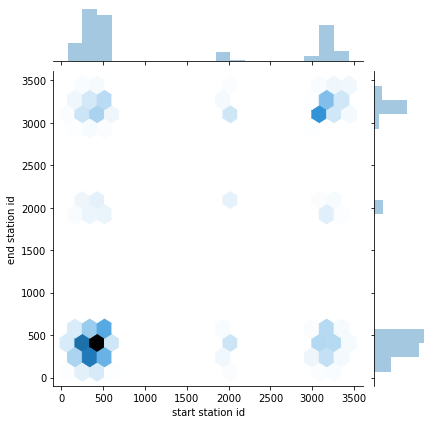

In [33]:
ny_table_notsubs = ny_table[ny_table['usertype']=='Customer']
sns.jointplot('start station id', 'end station id', data=ny_table_notsubs, kind='hex')

I wanted to see if the results would be the same or different for DC.

Text(0.5, 1.0, 'Distribution of Start Stations in DC')

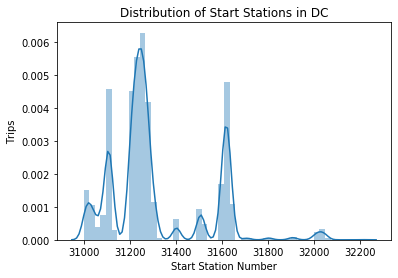

In [34]:
sns.distplot(dc_table['Start station number'], label='Start Station Number')
plt.xlabel('Start Station Number')
plt.ylabel('Trips')
plt.title('Distribution of Start Stations in DC')

Text(0.5, 1.0, 'Start and End Stations in DC')

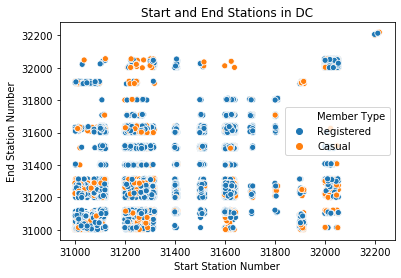

In [35]:
sns.scatterplot(dc_table['Start station number'], dc_table['End station number'], hue=dc_table['Member Type'])
plt.xlabel('Start Station Number')
plt.ylabel('End Station Number')
plt.title('Start and End Stations in DC')

Again, the scatterplot was hard to read, so I used a jointplot instead.

Text(0.5, 1, 'Start and End Stations in DC')

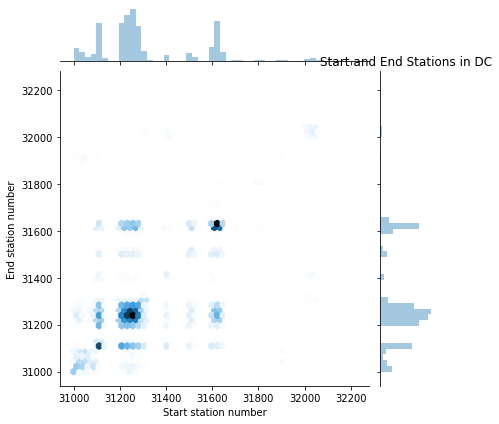

In [36]:
sns.jointplot('Start station number', 'End station number', data=dc_table, kind='hex')
plt.title('Start and End Stations in DC')

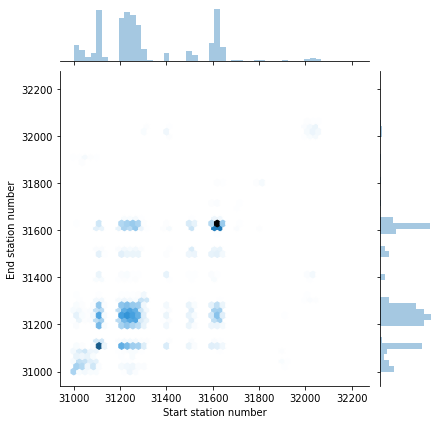

In [37]:
dc_table_subs = dc_table[dc_table['Member Type']=='Registered']
sns.jointplot('Start station number', 'End station number', data=dc_table_subs, kind='hex')

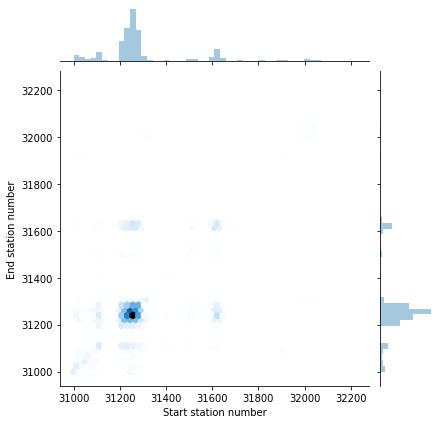

In [38]:
dc_table_notsubs = dc_table[dc_table['Member Type']=='Casual']
sns.jointplot('Start station number', 'End station number', data=dc_table_notsubs, kind='hex')

### 1.3.4 Insights and Hypothesis

I tried to explore the relationship between start and end stations in New York, because the distribution had quite an interesting shape, thinking perhaps the location of the stations would explain the peculiar shape, but there doesn't seem to be any correlation between the locations of the stations and their numbers. Interestingly enough, the grid-like streets of New York are vaguely represented in the plot between start and end stations, so I decided to plot the same attributes in DC, and while there also isn't strong correlation, the grid-like characteristic is more pronounced. I think the start and end stations that peak in both New York and DC are highly popularized areas, and would need more data concerning the locations in order to test this, possibly starting with the latitude and longitude of the DC stations. This could prove to be important, because if the route that most people take can be discovered, more bikes can be stocked along it, resulting in more customers.

My hypothesis is that whether a customer is subscribed or not does not affect where they are starting from. This would be my null hypothesis, and I would shuffle the data in each city dataset, and resample, performing an A/B test to determine if there is significant variation in start stations based on user type.

# 2 Hypothesis Testing

## 2.1

In [39]:
chicago_table_2 = chicago_table
chicago_table_2_duration = chicago_table_2['tripduration']
chicago_table_2_starttime = [datetime.strptime(i, '%m/%d/%Y %H:%M').hour for i in chicago_table_copy['starttime']]
chicago_table_2_stoptime = [datetime.strptime(i, '%m/%d/%Y %H:%M').hour for i in chicago_table_copy['stoptime']]
chicago_table_2['starttime_trunc'] = chicago_table_2_starttime
chicago_table_2['stoptime_trunc'] = chicago_table_2_stoptime

In [40]:
n = len(chicago_table_2['tripduration'])
rs = np.random.RandomState(0)
random_idxs = rs.choice(n,n, replace=False)

In [41]:
S1 = chicago_table_2.iloc[random_idxs[:-(int)(n*0.6)]]
S2 = chicago_table_2.iloc[random_idxs[(int)(n*0.6)-(int)(n*0.2)]:]
S3 = chicago_table_2.iloc[random_idxs[-(int)(n*0.2):]]

In [42]:
log_model = LogisticRegression()

In [43]:
x_train_chi = S1[['tripduration', 'starttime_trunc', 'stoptime_trunc']]
y_train_chi = S1['usertype']

In [44]:
log_model.fit(x_train_chi, y_train_chi)

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
thetas = log_model.coef_
thetas

array([[-0.00144668, -0.02209617, -0.01607594]])

In [46]:
def log_reg_model(theta, X):
    return 1/(1+np.e**(np.dot(X, (-theta.T))))

## 2.2

In [47]:
S2_0 = S2[S2['usertype']=='Customer']
S2_0_n = len(S2_0['usertype'])

In [48]:
si2_0 = log_reg_model(thetas, S2_0[['tripduration', 'starttime_trunc', 'stoptime_trunc']])

In [49]:
si3 = log_reg_model(thetas, S3[['tripduration', 'starttime_trunc', 'stoptime_trunc']])

In [50]:
def get_si3_pvals(s):
    return sum(si2_0 > s)/len(si2_0)

In [51]:
si3_pvals = np.apply_along_axis(get_si3_pvals, 0, si3)

In [52]:
S3['pvals'] = si3_pvals
S3_null = S3[S3['usertype']=='Customer']
S3_nonnull = S3[S3['usertype']=='Subscriber']

/srv/conda/envs/data102/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Distribution of Null p-values')

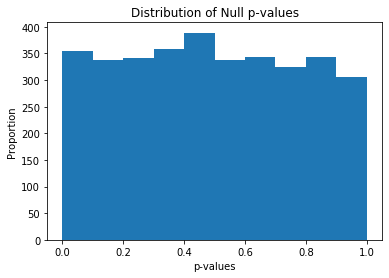

In [53]:
plt.hist(S3_null['pvals'])
plt.xlabel('p-values')
plt.ylabel('Proportion')
plt.title('Distribution of Null p-values')

Text(0.5, 1.0, 'Distribution of Non-Null p-values')

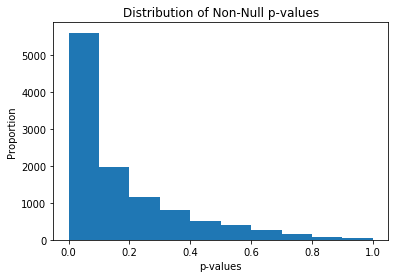

In [54]:
plt.hist(S3_nonnull['pvals'])
plt.xlabel('p-values')
plt.ylabel('Proportion')
plt.title('Distribution of Non-Null p-values')

The p-values for the null, casual riders, is roughly uniform, whereas the p-values for the non-null, non-casual riders, is significanly right skewed, which makes sense since the non-null come from the alternative distribution and therefore have p-values that are significant enough to reject the null.

## 2.3

In [55]:
def benjamini_hochberg(p_values, alpha):
    n = len(p_values)
    arr=np.argsort(p_values)
    decisions = []
    crit = alpha
    for i in np.arange(1,n+1):
        if p_values[arr[i-1]] <= i*(alpha/n):
            crit = p_values[arr[i-1]]
    for x in p_values:
        if x <= crit:
            decisions.append(1)
        else:
            decisions.append(0)
    return decisions

In [56]:
def calculations(predicted_discoveries, truth):
    fp = np.dot(predicted_discoveries, [1 - x for x in truth])
    tp = np.dot(predicted_discoveries, truth)
    if fp == 0 & tp == 0:
        fdp = 0
        sensitivity = 0
    else:
        fdp = fp / (fp+tp)
        sensitivity = tp / (np.count_nonzero(truth))
    return fdp, sensitivity

In [57]:
S3_BH = benjamini_hochberg(si3_pvals, 0.2)

In [58]:
def usertype_int(S3):
    arr = []
    for i in S3['usertype']:
        if i == 'Customer':
            arr.append(0)
        elif i == 'Subscriber':
            arr.append(1)
    return arr

In [59]:
calculations(S3_BH, usertype_int(S3))

(0.052960128876359244, 0.4280513333940111)

In [60]:
def run_BH():
    trials = 200
    all_si3_pvals = []
    all_fdp = []
    all_sens = []
    for i in np.arange(trials):
    #     sample S1, S2, S3
    #     n = len(chicago_table_2['tripduration'])
    #     rs = np.random.RandomState(0)
        random_idxs = rs.choice(n,n, replace=False)
        S1 = chicago_table_2.iloc[random_idxs[:-(int)(n*0.6)]]
        S2 = chicago_table_2.iloc[random_idxs[(int)(n*0.6)-(int)(n*0.2)]:]
        S3 = chicago_table_2.iloc[random_idxs[-(int)(n*0.2):]] 
        log_model = LogisticRegression()
        x_train_chi = S1[['tripduration', 'starttime_trunc', 'stoptime_trunc']]
        y_train_chi = S1['usertype']
        log_model.fit(x_train_chi, y_train_chi)
        thetas = log_model.coef_
        S2_0 = S2[S2['usertype']=='Customer']
        S2_0_n = len(S2_0['usertype'])
        si2_0 = log_reg_model(thetas, S2_0[['tripduration', 'starttime_trunc', 'stoptime_trunc']])
        si3 = log_reg_model(thetas, S3[['tripduration', 'starttime_trunc', 'stoptime_trunc']])
        si3_pvals = np.apply_along_axis(get_si3_pvals, 0, si3)
        BH = benjamini_hochberg(si3_pvals, 0.2)
        calcs = calculations(BH, usertype_int(S3))
        all_si3_pvals.append(si3_pvals)
        all_fdp.append(calcs[0])
        all_sens.append(calcs[1])
    return all_si3_pvals, all_fdp, all_sens

In [61]:
res = run_BH()

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

The average FDP is

In [62]:
np.mean(res[1])

0.06435991997620999

The average sensitivity is

In [63]:
np.mean(res[2])

0.4792316388487845

The average FDP is well below 0.2, because Benjamini-Hochberg has an alpha level of 0.2 and also because the way the p-values are calculated tests each S3 value against every S2 value, controlling the amount of false discoveries.

# 2.1 Optional*: Improving the Average Sensitivity 

I first converted the gender column into a numerical column in order to be able to include it in the model. I chose to use the gender because there was a large gap between male and female riders, which I thought would be useful in helping to distinguish between riders.

In [64]:
gen_num = []
for i in chicago_table_2['gender']:
    if i == 'Male':
        gen_num.append(1)
    else:
        gen_num.append(0)

In [65]:
chicago_table_2['gen_num'] = gen_num

I then repeated the process from the previous part, but included the gender column in the X_train feature matrix.

In [66]:
def test_one():
    random_idxs = rs.choice(n,n, replace=False)
    S1 = chicago_table_2.iloc[random_idxs[:-(int)(n*0.6)]]
    S2 = chicago_table_2.iloc[random_idxs[(int)(n*0.6)-(int)(n*0.2)]:]
    S3 = chicago_table_2.iloc[random_idxs[-(int)(n*0.2):]] 
    log_model = LogisticRegression()
    x_train_chi = S1[['tripduration', 'starttime_trunc', 'stoptime_trunc', 'gen_num']]
    y_train_chi = S1['usertype']
    log_model.fit(x_train_chi, y_train_chi)
    thetas = log_model.coef_
    S2_0 = S2[S2['usertype']=='Customer']
    S2_0_n = len(S2_0['usertype'])
    si2_0 = log_reg_model(thetas, S2_0[['tripduration', 'starttime_trunc', 'stoptime_trunc', 'gen_num']])
    si3 = log_reg_model(thetas, S3[['tripduration', 'starttime_trunc', 'stoptime_trunc', 'gen_num']])
    si3_pvals = np.apply_along_axis(get_si3_pvals, 0, si3)
    S3['pvals'] = si3_pvals
    S3_null = S3[S3['usertype']=='Customer']
    S3_nonnull = S3[S3['usertype']=='Subscriber']
    BH = benjamini_hochberg(si3_pvals, 0.2)
    calcs = calculations(BH, usertype_int(S3))
    return calcs, S3_null, S3_nonnull

In [67]:
t = test_one()

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


The FDP and sensitivity are as below. The FDP decreased and the sensitivity increased significantly.

In [68]:
t[0]

(0.0003653190452995616, 0.74892801751665)

I then plotted the non-null p-values, but the right skew was even more pronounced than before.

Text(0.5, 1.0, 'Distribution of Non-Null p-values')

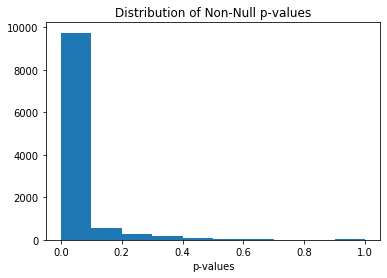

In [133]:
plt.hist(t[2]['pvals'])
plt.xlabel('p-values')
plt.title('Distribution of Non-Null p-values')

I then repeated the experiment 200 times, in order to get the average FDP and average sensitivity.

In [70]:
def run_BH_left():
    trials = 200
    all_si3_pvals = []
    all_fdp = []
    all_sens = []
    for i in np.arange(trials):
    #     sample S1, S2, S3
    #     n = len(chicago_table_2['tripduration'])
    #     rs = np.random.RandomState(0)
        random_idxs = rs.choice(n,n, replace=False)
        S1 = chicago_table_2.iloc[random_idxs[:-(int)(n*0.6)]]
        S2 = chicago_table_2.iloc[random_idxs[(int)(n*0.6)-(int)(n*0.2)]:]
        S3 = chicago_table_2.iloc[random_idxs[-(int)(n*0.2):]] 
        log_model = LogisticRegression()
        x_train_chi = S1[['tripduration', 'starttime_trunc', 'stoptime_trunc', 'gen_num']]
        y_train_chi = S1['usertype']
        log_model.fit(x_train_chi, y_train_chi)
        thetas = log_model.coef_
        S2_0 = S2[S2['usertype']=='Customer']
        S2_0_n = len(S2_0['usertype'])
        si2_0 = log_reg_model(thetas, S2_0[['tripduration', 'starttime_trunc', 'stoptime_trunc', 'gen_num']])
        si3 = log_reg_model(thetas, S3[['tripduration', 'starttime_trunc', 'stoptime_trunc', 'gen_num']])
        si3_pvals = np.apply_along_axis(get_si3_pvals, 0, si3)
        BH = benjamini_hochberg(si3_pvals, 0.2)
        calcs = calculations(BH, usertype_int(S3))
        all_si3_pvals.append(si3_pvals)
        all_fdp.append(calcs[0])
        all_sens.append(calcs[1])
    return all_si3_pvals, all_fdp, all_sens

In [71]:
res_left = run_BH_left()

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

The FDP and sensitivity are as below. I conclude that adding the gender slightly improves the FDP and greatly improves the sensitivity.

In [72]:
np.mean(res_left[1]), np.mean(res_left[2])

(0.03547574944927272, 0.808777992848781)

I then decided to try to curb the right skew by performing a log transformation of the duration column before using it in the feature matrix.

In [73]:
chicago_table_2['trip_dur_2'] = np.log(chicago_table_2['tripduration'])

In [74]:
def test_two():
    random_idxs = rs.choice(n,n, replace=False)
    S1 = chicago_table_2.iloc[random_idxs[:-(int)(n*0.6)]]
    S2 = chicago_table_2.iloc[random_idxs[(int)(n*0.6)-(int)(n*0.2)]:]
    S3 = chicago_table_2.iloc[random_idxs[-(int)(n*0.2):]] 
    log_model = LogisticRegression()
    x_train_chi = S1[['trip_dur_2', 'starttime_trunc', 'stoptime_trunc', 'gen_num']]
    y_train_chi = S1['usertype']
    log_model.fit(x_train_chi, y_train_chi)
    thetas = log_model.coef_
    S2_0 = S2[S2['usertype']=='Customer']
    S2_0_n = len(S2_0['usertype'])
    si2_0 = log_reg_model(thetas, S2_0[['trip_dur_2', 'starttime_trunc', 'stoptime_trunc', 'gen_num']])
    si3 = log_reg_model(thetas, S3[['trip_dur_2', 'starttime_trunc', 'stoptime_trunc', 'gen_num']])
    si3_pvals = np.apply_along_axis(get_si3_pvals, 0, si3)
    S3['pvals'] = si3_pvals
    S3_null = S3[S3['usertype']=='Customer']
    S3_nonnull = S3[S3['usertype']=='Subscriber']
    BH = benjamini_hochberg(si3_pvals, 0.2)
    calcs = calculations(BH, usertype_int(S3))
    return calcs, S3_null, S3_nonnull

In [75]:
t2 = test_two()

/srv/conda/envs/data102/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/data102/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


The average FDP and sensitivity are as below, as well as the graph of the non-null p-values. The log transformation produced the desired effect in improving the right skew, as it produced a more left skew graph. However, even though the FDP is extremely low, the sensitivity also dropped extremely low, to about 23%.

In [76]:
t2[0]

(0.0007883326763894363, 0.23165493923055835)

Text(0.5, 1.0, 'Distribution of Non-Null p-values')

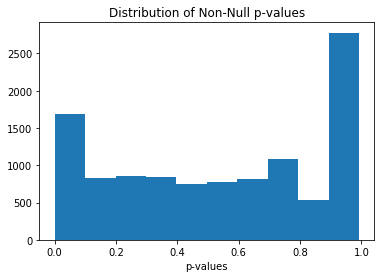

In [134]:
plt.hist(t2[2]['pvals'])
plt.xlabel('p-values')
plt.title('Distribution of Non-Null p-values')

In order to improve the sensitivity, I added the gender attribute, because there is a large disparity in the number of male and female riders in Chicago, like the one between subscribers and customers, I assumed the gender would help in identifying the usertype. This did cause a significant increase in the sensitivity from about 50% to 75%, but further aggravated the right skew. Then, I tried to take the log of the duration in order to reduce the right skew, and that improved it significantly, leading to a slightly left skewed graph, but in turn, the fdp and the sensitivity dropped extremely low. Therefore, I concluded that sensitivity and left skewness must be inversely related, and that it is not possible to increase one without decreasing the other.

# 3 Gaussian Mixture Models of Trip Durations

## 3.1 Difference in Distribution of Trip Durations Based On User Type

In [78]:
chicago_table.groupby(chicago_table['usertype']).agg('mean')['tripduration']

usertype
Customer      1858.786868
Subscriber     724.032101
Name: tripduration, dtype: float64

In [79]:
ny_table.groupby(ny_table['usertype']).agg('mean')['tripduration']

usertype
Customer      1978.920258
Subscriber     820.847431
Name: tripduration, dtype: float64

In [80]:
dc_table.groupby(dc_table['Member Type']).agg('mean')['Duration (ms)']/6000

Member Type
Casual        416.780314
Registered    125.281205
Name: Duration (ms), dtype: float64

It is reasonable to believe that there should be a difference between the distributions of subscribed and non-subscribed customers, because subscribers will most likely be taking the same or similar route each time. They most likely subscribed because they will be repeatedly using the service, and thus, since they take a roughly similar trip each time, then the trip duration will also be about the same every time. In addition, in all 3 cities, casual customers have a longer average trip duration than registered subscribers, meaning there will be a difference in the distributions based on the user type.

## 3.2 E-M Algorithm

In [81]:
def gmm_expectation_maximization(data, pi_0, mu_0, pi_1, mu_1, num_steps):
    for step in range(num_steps):
        # First run the expectation step.
        gaussian_prob_0 = (np.exp(-(data - mu_0) ** 2 / (2 * sigma_0)) /
                           (np.sqrt(2 * np.pi) * sigma_0))
        gaussian_prob_1 = (np.exp(-(data - mu_1) ** 2 / (2 * sigma_1)) /
                           (np.sqrt(2 * np.pi) * sigma_1))
        normalizing_factor = pi_0 * gaussian_prob_0 + pi_1 * gaussian_prob_1
        # z_k is the vector of estimated probabilities that each datapoint i
        # belongs to the distribution k. In other words the ith index is an
        # estimate of P(K=k|x_i).
        z_0 = pi_0 * gaussian_prob_0 / normalizing_factor
        z_1 = pi_1 * gaussian_prob_1 / normalizing_factor
        
        # Now run the maximization step.
        # N_k is the estimated number of points assigned to the distribution k.
        N_0 = np.sum(z_0)
        N_1 = np.sum(z_1)
        pi_0 = N_0 / data.shape[0]
        pi_1 = N_1 / data.shape[0]
        mu_0 = np.sum(data*z_0) / N_0
        mu_1 = np.sum(data*z_1) / N_1
        
    return pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1

In [82]:
chicago_less_hr = chicago_table
chicago_less_hr['duration_hr'] = chicago_table['tripduration']/60
chicago_less_hr = chicago_less_hr[chicago_less_hr['duration_hr'] < 60]

In [83]:
subscriber_pi = len(chicago_less_hr[chicago_less_hr['usertype'] == 'Subscriber']) / len(chicago_less_hr['usertype'])
customer_pi = len(chicago_less_hr[chicago_less_hr['usertype'] == 'Customer']) / len(chicago_less_hr['usertype'])

subs = chicago_less_hr[chicago_less_hr['usertype'] == 'Subscriber']
subscriber_mu0 = np.mean(subs['duration_hr'])
subscriber_sigma0 = subs['duration_hr'].std()

custs = chicago_less_hr[chicago_less_hr['usertype'] == 'Customer']
customer_mu1 = np.mean(custs['duration_hr'])
customer_sigma1 = np.std(custs['duration_hr'])

In [84]:
sigma_0 = subscriber_sigma0
sigma_1 = customer_sigma1
pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1 = gmm_expectation_maximization(data=chicago_less_hr['duration_hr'], 
                             pi_0=subscriber_pi, mu_0=subscriber_mu0, 
                             pi_1=customer_pi, mu_1=customer_mu1, 
                             num_steps=100)

In [85]:
pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1

(0.6970301727563138,
 8.820056901500417,
 7.258014670208784,
 0.3029698272436861,
 25.827432864529392,
 11.786795538839058)

#### changing to equal proportions

Since there are significantly more subscribers than customers, I wanted to see if changing the proportions would affect the results.

In [86]:
sigma_0 = subscriber_sigma0
sigma_1 = customer_sigma1
p_0, m_0, sig_0, p_1, m_1, sig_1 = gmm_expectation_maximization(data=chicago_less_hr['duration_hr'], 
                             pi_0=0.5, mu_0=subscriber_mu0, 
                             pi_1=0.5, mu_1=customer_mu1, 
                             num_steps=100)

In [87]:
p_0, m_0, sig_0, p_1, m_1, sig_1

(0.6970301727563138,
 8.820056901500415,
 7.258014670208784,
 0.30296982724368626,
 25.82743286452938,
 11.786795538839058)

#### switch the means

In [88]:
sigma_0 = subscriber_sigma0
sigma_1 = customer_sigma1
p_0, m_0, sig_0, p_1, m_1, sig_1 = gmm_expectation_maximization(data=chicago_less_hr['duration_hr'], 
                             pi_0=subscriber_pi, mu_0=customer_mu1, 
                             pi_1=customer_pi, mu_1=subscriber_mu0, 
                             num_steps=100)

In [89]:
p_0, m_0, sig_0, p_1, m_1, sig_1

(0.17549298362566923,
 30.525584824562568,
 7.258014670208784,
 0.8245070163743308,
 10.449580816174873,
 11.786795538839058)

#### switch the standard deviations

In [90]:
sigma_0 = customer_sigma1
sigma_1 = subscriber_sigma0
p_0, m_0, sig_0, p_1, m_1, sig_1 = gmm_expectation_maximization(data=chicago_less_hr['duration_hr'], 
                             pi_0=subscriber_pi, mu_0=subscriber_mu0, 
                             pi_1=customer_pi, mu_1=customer_mu1, 
                             num_steps=100)

In [91]:
p_0, m_0, sig_0, p_1, m_1, sig_1

(0.8245070163743308,
 10.449580816174873,
 11.786795538839058,
 0.17549298362566923,
 30.525584824562568,
 7.258014670208784)

#### switch mean and variance

In [92]:
sigma_0 = customer_sigma1
sigma_1 = subscriber_sigma0
p_0, m_0, sig_0, p_1, m_1, sig_1 = gmm_expectation_maximization(data=chicago_less_hr['duration_hr'], 
                             pi_0=subscriber_pi, mu_0=customer_mu1, 
                             pi_1=customer_pi, mu_1=subscriber_mu0, 
                             num_steps=100)

In [93]:
p_0, m_0, sig_0, p_1, m_1, sig_1

(0.30296982724368626,
 25.82743286452938,
 11.786795538839058,
 0.6970301727563138,
 8.820056901500415,
 7.258014670208784)

#### changing to equal subscriber mean

In [94]:
sigma_0 = subscriber_sigma0
sigma_1 = customer_sigma1
p_0, m_0, sig_0, p_1, m_1, sig_1 = gmm_expectation_maximization(data=chicago_less_hr['duration_hr'], 
                             pi_0=subscriber_pi, mu_0=subscriber_mu0, 
                             pi_1=customer_pi, mu_1=subscriber_mu0, 
                             num_steps=100)

In [95]:
p_0, m_0, sig_0, p_1, m_1, sig_1

(0.6970301727563138,
 8.820056901500415,
 7.258014670208784,
 0.30296982724368626,
 25.82743286452938,
 11.786795538839058)

#### changing to equal customer mean

In [96]:
sigma_0 = subscriber_sigma0
sigma_1 = customer_sigma1
p_0, m_0, sig_0, p_1, m_1, sig_1 = gmm_expectation_maximization(data=chicago_less_hr['duration_hr'], 
                             pi_0=subscriber_pi, mu_0=customer_mu1, 
                             pi_1=customer_pi, mu_1=customer_mu1, 
                             num_steps=100)

In [97]:
p_0, m_0, sig_0, p_1, m_1, sig_1

(0.17549298362566923,
 30.525584824562568,
 7.258014670208784,
 0.8245070163743308,
 10.449580816174873,
 11.786795538839058)

#### changing to equal subscriber variance

In [98]:
sigma_0 = subscriber_sigma0
sigma_1 = subscriber_sigma0
p_0, m_0, sig_0, p_1, m_1, sig_1 = gmm_expectation_maximization(data=chicago_less_hr['duration_hr'], 
                             pi_0=subscriber_pi, mu_0=subscriber_mu0, 
                             pi_1=customer_pi, mu_1=customer_mu1, 
                             num_steps=100)

In [99]:
p_0, m_0, sig_0, p_1, m_1, sig_1

(0.7496680424095257,
 9.449940087665192,
 7.258014670208784,
 0.25033195759047444,
 27.517303978221978,
 7.258014670208784)

#### changing to equal customer variance

In [100]:
sigma_0 = customer_sigma1
sigma_1 = customer_sigma1
p_0, m_0, sig_0, p_1, m_1, sig_1 = gmm_expectation_maximization(data=chicago_less_hr['duration_hr'], 
                             pi_0=subscriber_pi, mu_0=subscriber_mu0, 
                             pi_1=customer_pi, mu_1=customer_mu1, 
                             num_steps=100)

In [101]:
p_0, m_0, sig_0, p_1, m_1, sig_1

(0.768174294952333,
 9.699080194895624,
 11.786795538839058,
 0.23182570504766695,
 28.134043923846058,
 11.786795538839058)

Changing the proportions doesn't change the results at all, but switching the subscriber mean to be higher results in a higher subscriber mean and lower customer mean. Switching the standard deviations so that the subscriber std is higher than the customer std results in higher std for the resulting subscriber std, but also decreases the subscriber mean and increases the customer mean. Switching both mean and variance effectively switches the results. Giving equivalent means either produces no effect or the same effect as switching the means. Changing the variance to be equal gives slightly different results, producing equivalent resulting variances.

## 3.3 Posterior Probability

In [102]:
gaussian_prob_0 = (np.exp(-(chicago_less_hr['duration_hr'] - mu_0) ** 2 / 
                          (2 * sigma_0)) / (np.sqrt(2 * np.pi) * sigma_0))
gaussian_prob_1 = (np.exp(-(chicago_less_hr['duration_hr'] - mu_1) ** 2 / 
                          (2 * sigma_1)) / (np.sqrt(2 * np.pi) * sigma_1))
normalizing_factor = pi_0 * gaussian_prob_0 + pi_1 * gaussian_prob_1
z_0 = pi_0 * gaussian_prob_0 / normalizing_factor
z_1 = pi_1 * gaussian_prob_1 / normalizing_factor

The posterior probability is given by

In [103]:
z_0

0        0.972372
1        1.000000
2        1.000000
3        0.070996
4        0.999957
           ...   
72126    1.000000
72127    0.999999
72128    0.530450
72129    0.000043
72130    0.999980
Name: duration_hr, Length: 70618, dtype: float64

## 3.4

In [104]:
sub_or_not = []
for i in z_0:
    if i > 0.5:
        sub_or_not.append(1)
    else:
        sub_or_not.append(0)

In [105]:
sub_true = []
for i in chicago_less_hr['usertype']:
    if i == 'Subscriber':
        sub_true.append(1)
    elif i == 'Customer':
        sub_true.append(0)

In [106]:
fp = np.dot(sub_or_not, [1 - x for x in sub_true])
fn = np.dot([1 - x for x in sub_or_not], sub_true)

The error of the classifier is:

In [107]:
(fp+fn)/(len(sub_true))

0.2160780537540004

## 3.5

In [108]:
ny_table_drop = ny_table.dropna()
ny_less_hr = ny_table_drop
ny_less_hr['duration_hr'] = ny_table_drop['tripduration']/60
ny_less_hr = ny_less_hr[ny_less_hr['duration_hr'] < 60]

/srv/conda/envs/data102/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
gaussian_prob_0 = (np.exp(-(ny_less_hr['duration_hr'] - mu_0) ** 2 / 
                          (2 * sigma_0)) / (np.sqrt(2 * np.pi) * sigma_0))
gaussian_prob_1 = (np.exp(-(ny_less_hr['duration_hr'] - mu_1) ** 2 / 
                          (2 * sigma_1)) / (np.sqrt(2 * np.pi) * sigma_1))
normalizing_factor = pi_0 * gaussian_prob_0 + pi_1 * gaussian_prob_1
z_0 = pi_0 * gaussian_prob_0 / normalizing_factor
z_1 = pi_1 * gaussian_prob_1 / normalizing_factor

In [110]:
sub_or_not = []
for i in z_0:
    if i > 0.5:
        sub_or_not.append(1)
    else:
        sub_or_not.append(0)

In [111]:
sub_ny_true = []
for i in ny_less_hr['usertype']:
    if i == 'Subscriber':
        sub_ny_true.append(1)
    elif i == 'Customer':
        sub_ny_true.append(0)

In [112]:
fp = np.dot(sub_or_not, [1 - x for x in sub_ny_true])
fn = np.dot([1 - x for x in sub_or_not], sub_ny_true)

In [113]:
(fp+fn)/(len(sub_ny_true))

0.19834591962023498

In [114]:
dc_table_drop = dc_table.dropna()
dc_less_hr = dc_table_drop
dc_less_hr['duration_hr'] = dc_table_drop['Duration (ms)']/60000
dc_less_hr = dc_less_hr[dc_less_hr['duration_hr'] < 60]

In [115]:
gaussian_prob_0 = (np.exp(-(dc_less_hr['duration_hr'] - mu_0) ** 2 / 
                          (2 * sigma_0)) / (np.sqrt(2 * np.pi) * sigma_0))
gaussian_prob_1 = (np.exp(-(dc_less_hr['duration_hr'] - mu_1) ** 2 / 
                          (2 * sigma_1)) / (np.sqrt(2 * np.pi) * sigma_1))
normalizing_factor = pi_0 * gaussian_prob_0 + pi_1 * gaussian_prob_1
z_0 = pi_0 * gaussian_prob_0 / normalizing_factor
z_1 = pi_1 * gaussian_prob_1 / normalizing_factor

In [116]:
sub_or_not = []
for i in z_0:
    if i > 0.5:
        sub_or_not.append(1)
    else:
        sub_or_not.append(0)

In [117]:
sub_dc_true = []
for i in dc_less_hr['Member Type']:
    if i == 'Registered':
        sub_dc_true.append(1)
    elif i == 'Casual':
        sub_dc_true.append(0)

In [118]:
fp = np.dot(sub_or_not, [1 - x for x in sub_dc_true])
fn = np.dot([1 - x for x in sub_or_not], sub_dc_true)

In [119]:
(fp+fn)/(len(sub_dc_true))

0.2109278935586594

This classifier performs pretty well on both the NY and DC datasets, with the error almost equivalent to that of the Chicago dataset. The similarity is surprising given that it was based on the Chicago dataset, but because the proportions of subscribers/non-subscribers is similar for all three datasets, that could be why it performed so well. All the errors are around 0.22.

# 4 Causality and Experiment Design

## 4.1.1 The Causal Model

In [120]:
# weathersit affect cnt
# temp is poss conf
# use hum as instrum var

# hum = Z
# weathersit = X*
# num rentals = Y
# temp = X

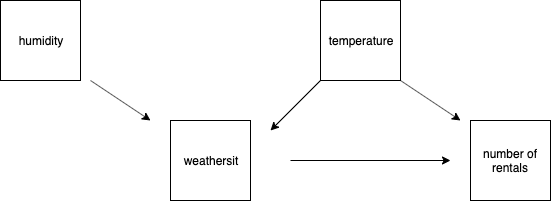

The assumption is that humidity does not affect number of rentals except through weathersit, so Z is independent of Y, and can be used as an instrumental variable.

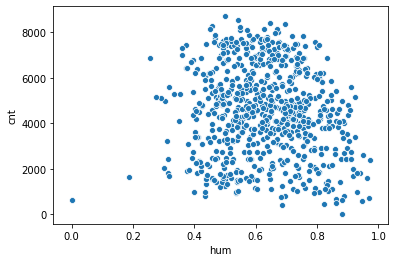

In [121]:
sns.scatterplot(daily_table['hum'], daily_table['cnt'])

There seems to be no relation between humidity and the number of rentals, as there is no pattern or correlation between the two variables.

## 4.1.2 2 Stage Least Squares

In [122]:
# first, predict X* from Z and X to eliminate bias
# second, regress Y onto X and ^X* (predicted values)

First, we use a variable independent of the number of rentals in order to predict weathersit without incurring bias from confounding factors when we perform the regression. Thus, we use humidity and temperature to predict weathersit.

In [123]:
stage1_features = np.column_stack((daily_table['hum'], daily_table['temp']))
stage1_features_w_const = sm.add_constant(stage1_features)
stage1_ols = sm.OLS(daily_table['weathersit'], stage1_features_w_const)
stage1_ols_results = (stage1_ols.fit()).params

We predict weathersit using a linear model, with random added noise.

In [124]:
ws_predicted = stage1_ols_results[1]*daily_table['hum'] + stage1_ols_results[2]*daily_table['temp'] + stage1_ols_results[0]

In the second stage, we regress the number of rentals onto our predicted weathersit in order to determine if there is a causal relationship. Thus, we use our predicted weathersit and temperature and regress number of rentals onto these features.

In [125]:
stage2_features = np.column_stack((ws_predicted, daily_table['temp']))
stage2_features_w_const = sm.add_constant(stage2_features)  
stage2_model = sm.OLS(daily_table['cnt'], stage2_features_w_const)
stage2ols_results = (stage2_model.fit()).params
alpha_2SLS = stage2ols_results[1]

In [126]:
alpha_2SLS 

-1057.2981644680553

We can see there is a negative correlation between weathersit and number of rentals, which makes sense, because the larger the weathersit, the more averse the weather is, meaning less people will be outside riding bikes. The large coefficient could be attributed to the fact that temperature and humidity are small in scale, whereas number of rentals is large in scale.

#### for casual riders

In [127]:
stage1_features = np.column_stack((daily_table['hum'], daily_table['temp']))
stage1_features_w_const = sm.add_constant(stage1_features)
stage1_ols = sm.OLS(daily_table['weathersit'], stage1_features_w_const)
stage1_ols_results = (stage1_ols.fit()).params

In [128]:
ws_predicted = stage1_ols_results[1]*daily_table['hum'] + stage1_ols_results[2]*daily_table['temp'] + stage1_ols_results[0]

In [129]:
stage2_features = np.column_stack((ws_predicted, daily_table['temp']))
stage2_features_w_const = sm.add_constant(stage2_features)  
stage2_model = sm.OLS(daily_table['casual'], stage2_features_w_const)
stage2ols_results = (stage2_model.fit()).params
alpha_2SLS = stage2ols_results[1]

In [130]:
alpha_2SLS

-303.37901939504707

#### for subscribed riders

In [131]:
stage1_features = np.column_stack((daily_table['hum'], daily_table['temp']))
stage1_features_w_const = sm.add_constant(stage1_features)
stage1_ols = sm.OLS(daily_table['weathersit'], stage1_features_w_const)
stage1_ols_results = (stage1_ols.fit()).params

ws_predicted = stage1_ols_results[1]*daily_table['hum'] + stage1_ols_results[2]*daily_table['temp'] + stage1_ols_results[0]

stage2_features = np.column_stack((ws_predicted, daily_table['temp']))
stage2_features_w_const = sm.add_constant(stage2_features)  
stage2_model = sm.OLS(daily_table['registered'], stage2_features_w_const)
stage2ols_results = (stage2_model.fit()).params
alpha_2SLS = stage2ols_results[1]

In [132]:
alpha_2SLS

-753.9191450730079

## 4.1.3 Discussion

#### Question 1

We are testing whether the weather situation (weathersit) has a causal effect on the number of rentals. We do this using 2 Stage Least Squares, because weathersit might be correlated with other factors that are present but not measured, and will cause significant bias in the ordinary least squares. Thus, we use humidity as an instrumental variable in order to eliminate the bias. We first predict weathersit based on humidity and temperature, and regress number of rentals onto temperature and our predicted values for weathersit. The results show that there is a causal relationship between weathersit and number of rentals, as more adverse weather conditions results in fewer rentals.

#### Question 2

The treatment effect is lower for unsubscribed riders than for subscribed riders, with the magnitude for the subscriber group being more than twice that of the unsubscribed group. The difference is magnitude is most likely because there are more subscribers than non-subscribers, and so the larger numbers inflate the magnitude of the coefficient.

#### Question 3

The causal graph above seems to correctly describe the relationship of the variables, but there is most likely a relationship between temperature and humidity, and the season would also likely affect the temperature and weathersit. Since there are more varaibles that need to be included in the graph, there will also likely need to be more arrows added. In addition, there should be an arrow from temperature to humidity.

#### Question 4

I would gather more data on the location and the region, including factors like tornado or hurricane risk or earthquake risk, as well as the month/time of year in order to see how bike rentals vary according to those factors. Then, I would again do 2 Stage Least Squares, using each of the new factors as an instrumental variable, to see if the results are consistent despite the instrumental variable used, in order to better determine a causal relationship between weathersit and number of rentals.